# Experiment 2

* try different threshold
* try multiple target of 2,4,5 retrain
* try regression technique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import time

In [4]:
from sklearn.feature_extraction import DictVectorizer

In [122]:
from sklearn.linear_model import LogisticRegression,LinearRegression

In [ ]:
from sklearn.

In [10]:
from catboost import CatBoostClassifier
from sklearn.model_selection import  StratifiedKFold,train_test_split,cross_val_score 
from sklearn.metrics import log_loss,f1_score,roc_auc_score,recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier , AdaBoostClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

In [9]:
data = pd.read_csv('data/NBA_Rookies_1979_2020(greater than 2 seasons).csv')
print(data.shape)
data.head()

(2842, 41)


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,Target
0,0,James Bailey,SEA,1979,WEST,22.0,9.0,67.0,726.0,312.0,122.0,271.0,0.450,0.0,0.0,0.000,68.0,101.0,0.673,71.0,126.0,197.0,28.0,21.0,54.0,79.0,116.0,10.84,4.7,1.82,0.00,1.01,1.06,1.88,2.9,0.4,0.31,0.81,1.18,1.73,1
1,1,Billy Ray Bates,POR,1980,WEST,23.0,4.0,16.0,235.0,180.0,72.0,146.0,0.493,8.0,19.0,0.421,28.0,39.0,0.718,13.0,16.0,29.0,31.0,14.0,2.0,20.0,26.0,14.69,11.3,4.50,0.50,1.75,0.81,1.00,1.8,1.9,0.88,0.12,1.25,1.62,1
2,2,Larry Bird*,BOS,1979,EAST,23.0,13.0,82.0,2955.0,1745.0,693.0,1463.0,0.474,58.0,143.0,0.406,301.0,360.0,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,36.04,21.3,8.45,0.71,3.67,2.63,7.76,10.4,4.5,1.74,0.65,3.21,3.40,1
3,3,Lawrence Boston,WSB,1980,EAST,23.0,1.0,13.0,125.0,56.0,24.0,52.0,0.462,0.0,0.0,0.000,8.0,13.0,0.615,19.0,20.0,39.0,2.0,4.0,2.0,8.0,25.0,9.62,4.3,1.85,0.00,0.62,1.46,1.54,3.0,0.2,0.31,0.15,0.62,1.92,0
4,4,Dudley Bradley,IND,1979,EAST,22.0,9.0,82.0,2027.0,688.0,275.0,609.0,0.452,2.0,5.0,0.400,136.0,174.0,0.782,69.0,154.0,223.0,252.0,211.0,48.0,166.0,194.0,24.72,8.4,3.35,0.02,1.66,0.84,1.88,2.7,3.1,2.57,0.59,2.02,2.37,1


In [7]:
team_map ={
    'NOK':'NOP',#pelicans
    'SDC':'LAC',# clippers
    #'NOP':'NOP',#pelicans
    'CHO':'CHH', #hornets
    'KCK':'SAC', # kings
    'VAN':'MEM', # grizzs
    'NOH':'NOP', # pelicans
    #'BRK':'BRK', # Nets
    'CHA':'CHH', # hornets
    #'OKC':'OKC', # okc
    'WAS':'WSH', #wizards
    #'TOR':'TOR', # raptors
    'WSB':'WSH', # wizards
    'SEA':'OKC', # sonics now okc
    'NJN':'BRK',#nets
    }

In [11]:
for old_team, new_team in team_map.items():
    data['Team'].replace(old_team, new_team, inplace=True)

In [12]:
data.rename(columns = {'Target':'target>=2'}, inplace = True)

data['target>=3'] = data.apply(lambda x : 1 if x.Career >=3  else 0 ,axis=1)
data['target>=4'] = data.apply(lambda x : 1 if x.Career >=4  else 0 ,axis=1)
data['target>=5'] = data.apply(lambda x : 1 if x.Career >=5  else 0 ,axis=1)

In [14]:
data['Team_index'] = data['Team'].astype('category').cat.codes
data['Year_index'] = data['Year'].astype('category').cat.codes

In [15]:
train = data[data.Year<=2017]
print(train.shape)
train.head()

(2709, 46)


,Unnamed: 0,Player,Team,Year,Conf,Age,Career,Games,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,MPpg,PTSpg,FGpg,3Ppg,FTpg,ORBpg,DRBpg,TRBpg,ASTpg,STLpg,BLKpg,TOVpg,PFpg,target>=2,target>=3,target>=4,target>=5,Team_index,Year_index
0,0,James Bailey,OKC,1979,WEST,22.0,9.0,67.0,726.0,312.0,122.0,271.0,0.450,0.0,0.0,0.000,68.0,101.0,0.673,71.0,126.0,197.0,28.0,21.0,54.0,79.0,116.0,10.84,4.7,1.82,0.00,1.01,1.06,1.88,2.9,0.4,0.31,0.81,1.18,1.73,1,1,1,1,20,0
1,1,Billy Ray Bates,POR,1980,WEST,23.0,4.0,16.0,235.0,180.0,72.0,146.0,0.493,8.0,19.0,0.421,28.0,39.0,0.718,13.0,16.0,29.0,31.0,14.0,2.0,20.0,26.0,14.69,11.3,4.50,0.50,1.75,0.81,1.00,1.8,1.9,0.88,0.12,1.25,1.62,1,1,1,0,24,1
2,2,Larry Bird*,BOS,1979,EAST,23.0,13.0,82.0,2955.0,1745.0,693.0,1463.0,0.474,58.0,143.0,0.406,301.0,360.0,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,36.04,21.3,8.45,0.71,3.67,2.63,7.76,10.4,4.5,1.74,0.65,3.21,3.40,1,1,1,1,1,0
3,3,Lawrence Boston,WSH,1980,EAST,23.0,1.0,13.0,125.0,56.0,24.0,52.0,0.462,0.0,0.0,0.000,8.0,13.0,0.615,19.0,20.0,39.0,2.0,4.0,2.0,8.0,25.0,9.62,4.3,1.85,0.00,0.62,1.46,1.54,3.0,0.2,0.31,0.15,0.62,1.92,0,0,0,0,29,1
4,4,Dudley Bradley,IND,1979,EAST,22.0,9.0,82.0,2027.0,688.0,275.0,609.0,0.452,2.0,5.0,0.400,136.0,174.0,0.782,69.0,154.0,223.0,252.0,211.0,48.0,166.0,194.0,24.72,8.4,3.35,0.02,1.66,0.84,1.88,2.7,3.1,2.57,0.59,2.02,2.37,1,1,1,1,11,0


In [16]:
pgs =[i for i  in train.columns if 'pg' in i]
pgs

['MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg']

In [17]:
predictors = pgs +['Age','Year_index','Team_index','FT', 'FT%','Games', 'MP','FG%']

In [25]:
predictors

['MPpg',
 'PTSpg',
 'FGpg',
 '3Ppg',
 'FTpg',
 'ORBpg',
 'DRBpg',
 'TRBpg',
 'ASTpg',
 'STLpg',
 'BLKpg',
 'TOVpg',
 'PFpg',
 'Age',
 'Year_index',
 'Team_index',
 'FT',
 'FT%',
 'Games',
 'MP',
 'FG%']

## c=0.1 and c=0.5

In [155]:
threshs = np.linspace(0.3,0.8,15)
threshs

array([0.3       , 0.33571429, 0.37142857, 0.40714286, 0.44285714,
       0.47857143, 0.51428571, 0.55      , 0.58571429, 0.62142857,
       0.65714286, 0.69285714, 0.72857143, 0.76428571, 0.8       ])

In [146]:
def train_model(model,df, y, C=1.0):
    cat = df[predictors].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    #model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

def train_model_lr(df, y, C=1.0):
    cat = df[predictors].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model
def predict(df, dv, model):
    cat = df[predictors].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [147]:
def run_folds(model,df_train_full,target,thresh, nfolds = 5):
    kfold = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1)
    aucs = [] ; aucs1 = []
    accuracys = [] ; accuracys1 = []
    recalls = [] ; recalls1 = []
    f1s =[] ; f1s1 =[]
    fold=1
    for train_idx, val_idx in kfold.split(df_train_full,df_train_full[target]):
            df_train = df_train_full.iloc[train_idx]
            df_val = df_train_full.iloc[val_idx]

            y_train = df_train[target].values
            y_val = df_val[target].values

            dv, model = train_model(model,df_train, y_train)
            
            y_pred_train = predict(df_train, dv, model)
            y_pred_test = predict(df_val, dv, model)
            
            preds_train =  (y_pred_train>= thresh)*1
            preds_test =  (y_pred_test>= thresh)*1

            accuracy = roc_auc_score(y_val, preds_test)
            accuracy1 = roc_auc_score(y_train, preds_train)
            
            auc = roc_auc_score(y_val, y_pred_test)
            auc1 = roc_auc_score(y_train, y_pred_train)
            #print(f'auc for fold {fold} = ',auc)
            
            recall = recall_score(y_val, preds_test)
            recall1 = recall_score(y_train, preds_train)
            #print(f'recall for fold {fold} = ',recall)
            
            f1 = f1_score(y_val, preds_test)
            f11 = f1_score(y_train, preds_train)
            #print(f'f1 for fold {fold} = ',f1)
            
            accuracys.append(accuracy) ; accuracys1.append(accuracy1)
            aucs.append(auc) ; aucs1.append(auc1)
            recalls.append(recall) ;recalls1.append(recall1)
            f1s.append(f1) ; f1s1.append(f11)
            print(f"fold {fold} done")
            fold+=1
    print()       
    print(' train accuracy = %0.3f ± %0.3f' % ( np.mean(accuracys1), np.std(accuracys1)))
    print(' test accuracy = %0.3f ± %0.3f' % ( np.mean(accuracys), np.std(accuracys)))        
    print()
    print(' train auc = %0.3f ± %0.3f' % ( np.mean(aucs1), np.std(aucs1)))
    print(' test auc = %0.3f ± %0.3f' % ( np.mean(aucs), np.std(aucs)))
    print()
    print(' train recall = %0.3f ± %0.3f' % ( np.mean(recalls1), np.std(recalls1)))
    print(' test  recall = %0.3f ± %0.3f' % ( np.mean(recalls), np.std(recalls)))
    print()
    print(' train f1 = %0.3f ± %0.3f' % ( np.mean(f1s1), np.std(f1s1)))
    print(' test f1 = %0.3f ± %0.3f' % ( np.mean(f1s), np.std(f1s)))
    print("=====================================")
    return np.mean(accuracys),np.mean(aucs) ,np.mean(recalls),np.mean(f1s)

In [19]:
lr_1 = LogisticRegression(solver='liblinear', C=0.1)
lr_5 = LogisticRegression(solver='liblinear', C=0.5)

In [ ]:
run_folds(model,df_train_full,target,thresh, nfolds = 5)

In [34]:
acc=[]
for n in range(100,2000,25):
    print(f'estimators = {n}')
    #Knn = KNeighborsClassifier(n_neighbors=n)
    rf_model = Random 
    accuracy,auc ,recall , f1= run_folds(model=lr_1,df_train_full=train,target='target>=5', thresh =t ,nfolds = 5)
    acc.append([accuracy,auc ,recall , f1])
    print()
    print('==================================')
    print()

threshold = 0.3
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.718 ± 0.007
 test accuracy = 0.717 ± 0.022

 train auc = 0.839 ± 0.005
 test auc = 0.835 ± 0.021

 train recall = 0.878 ± 0.003
 test  recall = 0.872 ± 0.025

 train f1 = 0.756 ± 0.005
 test f1 = 0.755 ± 0.018


threshold = 0.3357142857142857
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.733 ± 0.005
 test accuracy = 0.729 ± 0.015

 train auc = 0.839 ± 0.005
 test auc = 0.835 ± 0.021

 train recall = 0.853 ± 0.004
 test  recall = 0.851 ± 0.022

 train f1 = 0.761 ± 0.004
 test f1 = 0.758 ± 0.013


threshold = 0.37142857142857144
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.738 ± 0.005
 test accuracy = 0.739 ± 0.018

 train auc = 0.839 ± 0.005
 test auc = 0.835 ± 0.021

 train recall = 0.823 ± 0.006
 test  recall = 0.825 ± 0.021

 train f1 = 0.758 ± 0.005
 test f1 = 0.759 ± 0.016


threshold = 0.40714285714285714
fold 1 don

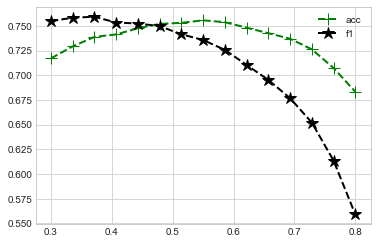

In [39]:
plt.style.use("seaborn-whitegrid")
plt.plot(threshs,np.array(acc)[:,0], color='green', marker='+', linestyle='dashed', linewidth=2, markersize=12,label='acc')
#plt.plot(threshs,np.array(acc)[:,1], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(threshs,np.array(acc)[:,-1], color='black', marker='*', linestyle='dashed', linewidth=2, markersize=12,label='f1')
plt.legend()

In [40]:
acc=[]
for t in threshs:
    print(f'threshold = {t}')
    #Knn = KNeighborsClassifier(n_neighbors=n)
    accuracy,auc ,recall , f1= run_folds(model=lr_5,df_train_full=train,target='target>=5', thresh =t ,nfolds = 5)
    acc.append([accuracy,auc ,recall , f1])
    print()
    print('==================================')
    print()

threshold = 0.3
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.719 ± 0.006
 test accuracy = 0.710 ± 0.020

 train auc = 0.842 ± 0.005
 test auc = 0.836 ± 0.020

 train recall = 0.884 ± 0.004
 test  recall = 0.873 ± 0.023

 train f1 = 0.759 ± 0.005
 test f1 = 0.750 ± 0.017


threshold = 0.3357142857142857
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.730 ± 0.004
 test accuracy = 0.728 ± 0.014

 train auc = 0.842 ± 0.005
 test auc = 0.836 ± 0.020

 train recall = 0.855 ± 0.004
 test  recall = 0.852 ± 0.022

 train f1 = 0.760 ± 0.003
 test f1 = 0.758 ± 0.012


threshold = 0.37142857142857144
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.739 ± 0.005
 test accuracy = 0.741 ± 0.018

 train auc = 0.842 ± 0.005
 test auc = 0.836 ± 0.020

 train recall = 0.826 ± 0.005
 test  recall = 0.826 ± 0.018

 train f1 = 0.759 ± 0.004
 test f1 = 0.761 ± 0.015


threshold = 0.40714285714285714
fold 1 don

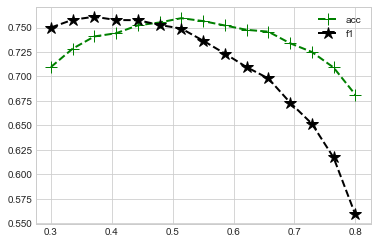

In [41]:
plt.style.use("seaborn-whitegrid")
plt.plot(threshs,np.array(acc)[:,0], color='green', marker='+', linestyle='dashed', linewidth=2, markersize=12,label='acc')
#plt.plot(threshs,np.array(acc)[:,1], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(threshs,np.array(acc)[:,-1], color='black', marker='*', linestyle='dashed', linewidth=2, markersize=12,label='f1')
plt.legend()

<AxesSubplot:ylabel='Frequency'>

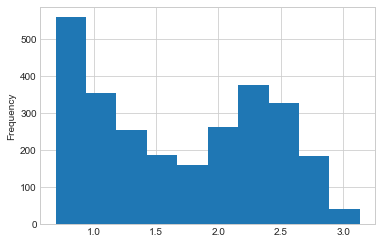

In [44]:
np.log1p(train.Career).plot(kind='hist')

In [20]:
skf = StratifiedKFold(n_splits = 10,shuffle=True,random_state=199)

In [52]:
a = pd.Series([1,2,3])

In [53]:
a

0    1
1    2
2    3
dtype: int64

In [54]:
a[1] = a[1]+1

In [55]:
a

0    1
1    3
2    3
dtype: int64

In [97]:
def model_predict(estimator,train,label,spliter_y, estimator_name,scale=False):
    mean_train = [] ; mean_train_f1 = [] ; mean_train_acc = []
    mean_test_val = [] ; mean_test_val_f1 = [] ; mean_test_val_acc = []
    train_pred = np.zeros(train.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(skf.split(train,spliter_y)):
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        print(f'========================Fold{count +1}==========================')
        
        estimator.fit(x_train, y_train)
        train_predict = estimator.predict_proba(x_train)[:,1]
        test_predict = estimator.predict_proba(x_test)[:,1]
        
        train_predict_f1 = estimator.predict(x_train)
        test_predict_f1 = estimator.predict(x_test)
        
        train_pred[test_index] += test_predict
        #val_pred+= estimator.predict_proba(test)[:,1]
        val_pred[test_index] = spliter_y.iloc[test_index]
        
        print('\nValidation scores : ','accuracy = ',accuracy_score(y_test,test_predict_f1), ' ;  roc = ', roc_auc_score(y_test,test_predict))
        print('\nTraining scores : ','accuracy = ',accuracy_score(y_train,train_predict_f1), ' ;  roc = ', roc_auc_score(y_train,train_predict))

        
        print('\nValidation scores : ','f1 = ',f1_score(y_test,test_predict_f1), ' ;  roc = ', roc_auc_score(y_test,test_predict))
        print('\nTraining scores : ','f1 = ',f1_score(y_train,train_predict_f1), ' ;  roc = ', roc_auc_score(y_train,train_predict))
        
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
        
        mean_train_f1.append(f1_score(y_train, train_predict_f1))
        mean_test_val_f1.append(f1_score(y_test,test_predict_f1))
        
        mean_train_acc.append(accuracy_score(y_train, train_predict_f1))
        mean_test_val_acc.append(accuracy_score(y_test,test_predict_f1))
        
    print('Average Testing accuracy,f1,ROC score for 10 folds split:',' acc = ',np.mean(mean_test_val_acc),' f1 = ',np.mean(mean_test_val_f1),' ; ROC = ',np.mean(mean_test_val))
    print('Average Training accuracy,f1,ROC score for 10 folds split:',' acc = ',np.mean(mean_train_acc),' f1 = ',np.mean(mean_train_f1),' ; ROC = ',np.mean(mean_train))
    print('standard Deviation for 10 folds split: F1 = ',np.std(mean_test_val_f1),' ; ROC = ',np.std(mean_test_val))
    return train_pred, val_pred, estimator_name

In [98]:
t2,v2, name  = model_predict(estimator=lr_1,train=train[predictors],spliter_y=train['target>=5'],label=train['target>=2'], estimator_name='lr_1_t2',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7785977859778598  ;  roc =  0.8557397176181706

Training scores :  accuracy =  0.7793273174733388  ;  roc =  0.8495829874520278

Validation scores :  f1 =  0.8333333333333333  ;  roc =  0.8557397176181706

Training scores :  f1 =  0.8355745721271394  ;  roc =  0.8495829874520278
========================Fold2==========================

Validation scores :  accuracy =  0.7453874538745388  ;  roc =  0.8229588704726827

Training scores :  accuracy =  0.7772764561115668  ;  roc =  0.8508101141709075

Validation scores :  f1 =  0.8169761273209549  ;  roc =  0.8229588704726827

Training scores :  f1 =  0.8333844737649585  ;  roc =  0.8508101141709075
========================Fold3==========================

Validation scores :  accuracy =  0.7859778597785978  ;  roc =  0.8479118920295392

Training scores :  accuracy =  0.7739950779327317  ;  roc =  0.8483201462566685

Validation scores :  f1 =  0.844919

In [99]:
v4.shape

(2709,)

In [100]:
t25,v25, name25  = model_predict(estimator=lr_5,train=train[predictors],label=train['target>=2'],spliter_y=train['target>=5'], estimator_name='lr_5_t2',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7859778597785978  ;  roc =  0.8532842234499692

Training scores :  accuracy =  0.7764561115668581  ;  roc =  0.8543486303100298

Validation scores :  f1 =  0.8388888888888889  ;  roc =  0.8532842234499692

Training scores :  f1 =  0.8339932988120622  ;  roc =  0.8543486303100298
========================Fold2==========================

Validation scores :  accuracy =  0.7675276752767528  ;  roc =  0.8311847759361572

Training scores :  accuracy =  0.7797374897456932  ;  roc =  0.8542666714789284

Validation scores :  f1 =  0.8337730870712401  ;  roc =  0.8311847759361572

Training scores :  f1 =  0.8359303391384052  ;  roc =  0.8542666714789284
========================Fold3==========================

Validation scores :  accuracy =  0.7822878228782287  ;  roc =  0.8527501909854852

Training scores :  accuracy =  0.7735849056603774  ;  roc =  0.8511643589282503

Validation scores :  f1 =  0.842666

In [101]:
t4,v4, name3  = model_predict(estimator=lr_1,train=train[predictors],spliter_y=train['target>=5'],label=train['target>=4'], estimator_name='lr_1_t4',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7749077490774908  ;  roc =  0.8439864483342744

Training scores :  accuracy =  0.7530762920426579  ;  roc =  0.8445165270778938

Validation scores :  f1 =  0.8  ;  roc =  0.8439864483342744

Training scores :  f1 =  0.7794871794871795  ;  roc =  0.8445165270778938
========================Fold2==========================

Validation scores :  accuracy =  0.7416974169741697  ;  roc =  0.8329456076215797

Training scores :  accuracy =  0.7592288761279737  ;  roc =  0.8454014681660683

Validation scores :  f1 =  0.7712418300653595  ;  roc =  0.8329456076215797

Training scores :  f1 =  0.7872417542587894  ;  roc =  0.8454014681660683
========================Fold3==========================

Validation scores :  accuracy =  0.7416974169741697  ;  roc =  0.8193422519509476

Training scores :  accuracy =  0.756357670221493  ;  roc =  0.8450322745171162

Validation scores :  f1 =  0.7770700636942675  ;  r

In [103]:
t45,v45, name4  = model_predict(estimator=lr_5,train=train[predictors],spliter_y=train['target>=5'],label=train['target>=4'], estimator_name='lr_5_t4',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7675276752767528  ;  roc =  0.8426877470355731

Training scores :  accuracy =  0.7584085315832649  ;  roc =  0.849533094899138

Validation scores :  f1 =  0.7947882736156352  ;  roc =  0.8426877470355731

Training scores :  f1 =  0.7852716004374772  ;  roc =  0.849533094899138
========================Fold2==========================

Validation scores :  accuracy =  0.7490774907749077  ;  roc =  0.8378752630995902

Training scores :  accuracy =  0.7600492206726825  ;  roc =  0.8477750101698729

Validation scores :  f1 =  0.7792207792207791  ;  roc =  0.8378752630995902

Training scores :  f1 =  0.7879666545849946  ;  roc =  0.8477750101698729
========================Fold3==========================

Validation scores :  accuracy =  0.7564575645756457  ;  roc =  0.8254180602006689

Training scores :  accuracy =  0.7571780147662018  ;  roc =  0.8482734367287843

Validation scores :  f1 =  0.79113924

In [105]:
t5,v5, name5  = model_predict(estimator=lr_1,train=train[predictors],spliter_y=train['target>=5'],label=train['target>=5'], estimator_name='lr_1_t5',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7453874538745388  ;  roc =  0.8390522875816994

Training scores :  accuracy =  0.7530762920426579  ;  roc =  0.8387046193126718

Validation scores :  f1 =  0.7315175097276264  ;  roc =  0.8390522875816994

Training scores :  f1 =  0.7444821731748728  ;  roc =  0.8387046193126718
========================Fold2==========================

Validation scores :  accuracy =  0.7675276752767528  ;  roc =  0.8200980392156862

Training scores :  accuracy =  0.7530762920426579  ;  roc =  0.8392079986163798

Validation scores :  f1 =  0.7622641509433962  ;  roc =  0.8200980392156862

Training scores :  f1 =  0.745777027027027  ;  roc =  0.8392079986163798
========================Fold3==========================

Validation scores :  accuracy =  0.7232472324723247  ;  roc =  0.8153050108932463

Training scores :  accuracy =  0.7596390484003281  ;  roc =  0.8405835431307905

Validation scores :  f1 =  0.7126436

In [106]:
t55,v55, name6  = model_predict(estimator=lr_5,train=train[predictors],spliter_y=train['target>=5'],label=train['target>=5'], estimator_name='lr_5_t5',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7601476014760148  ;  roc =  0.8388344226579519

Training scores :  accuracy =  0.7629204265791633  ;  roc =  0.8432202277724052

Validation scores :  f1 =  0.749034749034749  ;  roc =  0.8388344226579519

Training scores :  f1 =  0.7546689303904924  ;  roc =  0.8432202277724052
========================Fold2==========================

Validation scores :  accuracy =  0.7601476014760148  ;  roc =  0.8232570806100217

Training scores :  accuracy =  0.7579983593109105  ;  roc =  0.8416205852524669

Validation scores :  f1 =  0.7528517110266159  ;  roc =  0.8232570806100217

Training scores :  f1 =  0.75  ;  roc =  0.8416205852524669
========================Fold3==========================

Validation scores :  accuracy =  0.7269372693726938  ;  roc =  0.8214596949891066

Training scores :  accuracy =  0.7616899097621  ;  roc =  0.8421737641129589

Validation scores :  f1 =  0.717557251908397  ;  roc 

In [117]:
names =[name,name25,name3,name4,name5,name6,'target>=5']
names

['lr_1_t2', 'lr_5_t2', 'lr_1_t4', 'lr_5_t4', 'lr_1_t5', 'lr_5_t5', 'target>=5']

In [120]:
t_inputs =[t2,t25,t4,t45,t5,t55,v2]

In [136]:
stack_df=pd.DataFrame.from_dict(dict(zip(names,t_inputs)))

In [137]:
stack_df

,lr_1_t2,lr_5_t2,lr_1_t4,lr_5_t4,lr_1_t5,lr_5_t5,target>=5
0,0.879676,0.900737,0.819502,0.837410,0.740481,0.772187,1.0
1,0.566844,0.564547,0.500180,0.458108,0.461485,0.450997,0.0
2,0.998110,0.997872,0.996774,0.997287,0.995617,0.996420,1.0
3,0.382979,0.365476,0.261500,0.260791,0.241812,0.241707,0.0
4,0.961674,0.975940,0.873423,0.893327,0.832046,0.841033,1.0
...,...,...,...,...,...,...,...
2704,0.246243,0.222392,0.146305,0.127023,0.095158,0.079178,0.0
2705,0.552412,0.575765,0.406825,0.432540,0.280630,0.292182,1.0
2706,0.454960,0.412673,0.244309,0.248647,0.179424,0.167890,0.0
2707,0.659624,0.656181,0.532788,0.546550,0.396205,0.410148,0.0


In [140]:
model_predict(estimator=lr_5,train=stack_df.drop(['target>=5'],axis=1),spliter_y=stack_df['target>=5'],label=stack_df['target>=5'], estimator_name='lr_5_t5',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7675276752767528  ;  roc =  0.8386165577342048

Training scores :  accuracy =  0.7579983593109105  ;  roc =  0.836978458999823

Validation scores :  f1 =  0.7586206896551724  ;  roc =  0.8386165577342048

Training scores :  f1 =  0.7525167785234901  ;  roc =  0.836978458999823
========================Fold2==========================

Validation scores :  accuracy =  0.7638376383763837  ;  roc =  0.8230392156862746

Training scores :  accuracy =  0.7579983593109105  ;  roc =  0.8385309938309116

Validation scores :  f1 =  0.7611940298507464  ;  roc =  0.8230392156862746

Training scores :  f1 =  0.7527242246437553  ;  roc =  0.8385309938309116
========================Fold3==========================

Validation scores :  accuracy =  0.7232472324723247  ;  roc =  0.8181372549019609

Training scores :  accuracy =  0.7625102543068089  ;  roc =  0.8391830988379878

Validation scores :  f1 =  0.71482889

(array([0.79222054, 0.4414419 , 0.92206751, ..., 0.16589051, 0.41196039,
        0.63018152]),
 array([1., 0., 1., ..., 0., 0., 0.]),
 'lr_5_t5')

In [141]:
model_predict(estimator=lr_1,train=stack_df.drop(['target>=5'],axis=1),spliter_y=stack_df['target>=5'],label=stack_df['target>=5'], estimator_name='lr_5_t5',scale=False)

========================Fold1==========================

Validation scores :  accuracy =  0.7638376383763837  ;  roc =  0.8381263616557734

Training scores :  accuracy =  0.7559474979491386  ;  roc =  0.8360484186285336

Validation scores :  f1 =  0.7593984962406016  ;  roc =  0.8381263616557734

Training scores :  f1 =  0.75564681724846  ;  roc =  0.8360484186285336
========================Fold2==========================

Validation scores :  accuracy =  0.7601476014760148  ;  roc =  0.8227124183006536

Training scores :  accuracy =  0.7551271534044298  ;  roc =  0.8377920760829553

Validation scores :  f1 =  0.7619047619047619  ;  roc =  0.8227124183006536

Training scores :  f1 =  0.7550266721378744  ;  roc =  0.8377920760829553
========================Fold3==========================

Validation scores :  accuracy =  0.7232472324723247  ;  roc =  0.8149237472766885

Training scores :  accuracy =  0.7600492206726825  ;  roc =  0.8387820105157822

Validation scores :  f1 =  0.71910112

(array([0.76304883, 0.44510731, 0.88809962, ..., 0.21102092, 0.44567219,
        0.63043756]),
 array([1., 0., 1., ..., 0., 0., 0.]),
 'lr_5_t5')

In [143]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [144]:
predictors = ['lr_1_t2', 'lr_5_t2', 'lr_1_t4', 'lr_5_t4', 'lr_1_t5', 'lr_5_t5']

In [150]:
acc=[]
for n in range(5,200,5):
    print(f'n = {n}')
    Knn = KNeighborsClassifier(n_neighbors=n)
    accuracy,auc ,recall , f1= run_folds(model=Knn,df_train_full=stack_df,target='target>=5',thresh=0.5, nfolds = 5)
    acc.append([accuracy,auc ,recall , f1])
    print()
    print('==================================')
    print()

n = 5
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.809 ± 0.004
 test accuracy = 0.729 ± 0.019

 train auc = 0.896 ± 0.005
 test auc = 0.793 ± 0.022

 train recall = 0.793 ± 0.011
 test  recall = 0.712 ± 0.013

 train f1 = 0.805 ± 0.005
 test f1 = 0.724 ± 0.017


n = 10
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.780 ± 0.004
 test accuracy = 0.732 ± 0.022

 train auc = 0.868 ± 0.005
 test auc = 0.809 ± 0.022

 train recall = 0.798 ± 0.018
 test  recall = 0.750 ± 0.012

 train f1 = 0.783 ± 0.006
 test f1 = 0.737 ± 0.019


n = 15
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.771 ± 0.007
 test accuracy = 0.749 ± 0.018

 train auc = 0.859 ± 0.006
 test auc = 0.818 ± 0.020

 train recall = 0.746 ± 0.014
 test  recall = 0.721 ± 0.019

 train f1 = 0.765 ± 0.007
 test f1 = 0.742 ± 0.017


n = 20
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.772 ± 0.005
 

fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.763 ± 0.005
 test accuracy = 0.757 ± 0.023

 train auc = 0.839 ± 0.005
 test auc = 0.836 ± 0.021

 train recall = 0.710 ± 0.019
 test  recall = 0.701 ± 0.025

 train f1 = 0.750 ± 0.009
 test f1 = 0.742 ± 0.021


n = 120
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.765 ± 0.005
 test accuracy = 0.756 ± 0.021

 train auc = 0.839 ± 0.005
 test auc = 0.836 ± 0.021

 train recall = 0.716 ± 0.018
 test  recall = 0.706 ± 0.021

 train f1 = 0.752 ± 0.007
 test f1 = 0.743 ± 0.020


n = 125
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.764 ± 0.005
 test accuracy = 0.757 ± 0.025

 train auc = 0.839 ± 0.005
 test auc = 0.836 ± 0.021

 train recall = 0.712 ± 0.021
 test  recall = 0.706 ± 0.026

 train f1 = 0.751 ± 0.008
 test f1 = 0.744 ± 0.024


n = 130
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.763 ± 0.005
 tes

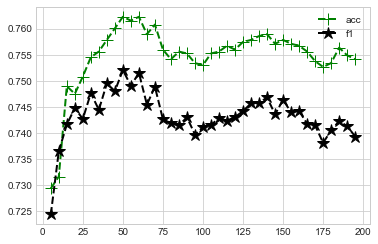

In [152]:
plt.style.use("seaborn-whitegrid")
plt.plot(range(5,200,5),np.array(acc)[:,0], color='green', marker='+', linestyle='dashed', linewidth=2, markersize=12,label='acc')
#plt.plot(threshs,np.array(acc)[:,1], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(range(5,200,5),np.array(acc)[:,-1], color='black', marker='*', linestyle='dashed', linewidth=2, markersize=12,label='f1')
plt.legend()

In [153]:
    Knn50 = KNeighborsClassifier(n_neighbors=50)

In [157]:
acc=[]
for t in threshs:
    print(f'threshold = {t}')
    #Knn = KNeighborsClassifier(n_neighbors=n)
    accuracy,auc ,recall , f1= run_folds(model=Knn50,df_train_full=stack_df,target='target>=5', thresh =t ,nfolds = 5)
    acc.append([accuracy,auc ,recall , f1])
    print()
    print('==================================')
    print()

threshold = 0.3
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.710 ± 0.006
 test accuracy = 0.699 ± 0.017

 train auc = 0.846 ± 0.005
 test auc = 0.834 ± 0.018

 train recall = 0.899 ± 0.007
 test  recall = 0.886 ± 0.018

 train f1 = 0.756 ± 0.005
 test f1 = 0.746 ± 0.014


threshold = 0.3357142857142857
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.727 ± 0.004
 test accuracy = 0.717 ± 0.019

 train auc = 0.846 ± 0.005
 test auc = 0.834 ± 0.018

 train recall = 0.875 ± 0.008
 test  recall = 0.863 ± 0.021

 train f1 = 0.762 ± 0.003
 test f1 = 0.753 ± 0.015


threshold = 0.37142857142857144
fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done

 train accuracy = 0.744 ± 0.007
 test accuracy = 0.734 ± 0.012

 train auc = 0.846 ± 0.005
 test auc = 0.834 ± 0.018

 train recall = 0.842 ± 0.010
 test  recall = 0.835 ± 0.019

 train f1 = 0.766 ± 0.004
 test f1 = 0.758 ± 0.010


threshold = 0.40714285714285714
fold 1 don

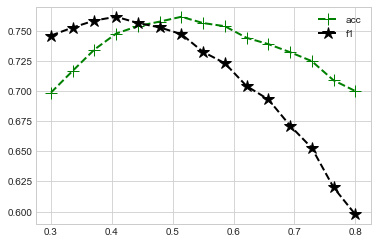

In [158]:
plt.style.use("seaborn-whitegrid")
plt.plot(threshs,np.array(acc)[:,0], color='green', marker='+', linestyle='dashed', linewidth=2, markersize=12,label='acc')
#plt.plot(threshs,np.array(acc)[:,1], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(threshs,np.array(acc)[:,-1], color='black', marker='*', linestyle='dashed', linewidth=2, markersize=12,label='f1')
plt.legend()

<AxesSubplot:xlabel='lr_1_t4', ylabel='lr_1_t5'>

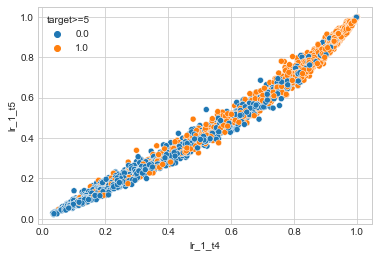

In [159]:
sns.scatterplot(data=stack_df,x='lr_1_t4',y='lr_1_t5',hue='target>=5')

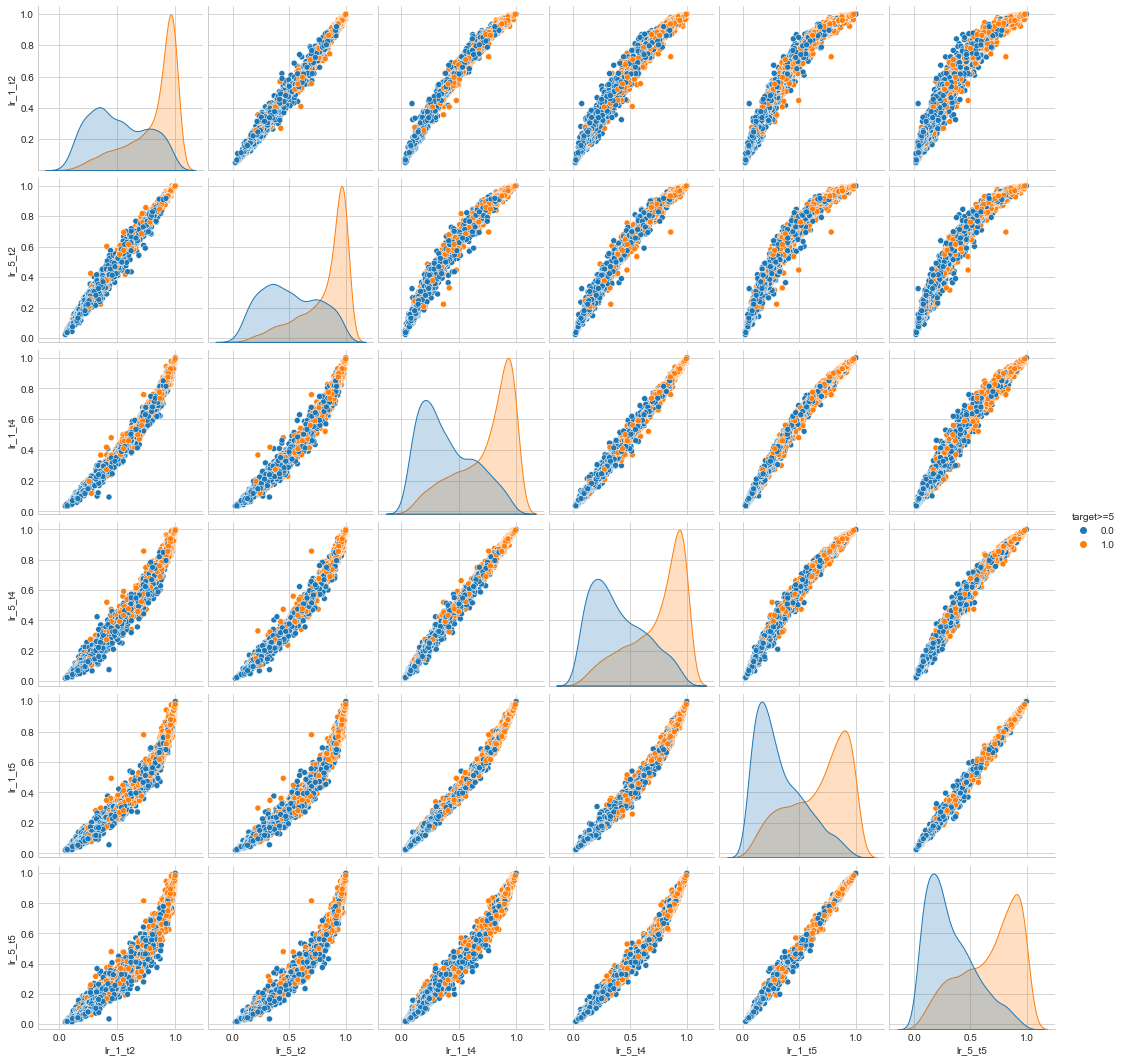

In [160]:
sns.pairplot(data=stack_df,hue='target>=5')

In [173]:
reg = LinearRegression()

In [163]:
predictors_reg = train.columns.drop(['Unnamed: 0', 'Player', 'Team', 'Year', 'Conf','Career', 'target>=2', 'target>=3',
       'target>=4', 'target>=5',])

In [176]:
predictors_reg  = ['lr_1_t2', 'lr_5_t2', 'lr_1_t4', 'lr_5_t4']# 'lr_1_t5', 'lr_5_t5']

In [178]:
stack_df[predictors_reg]

,lr_1_t2,lr_5_t2,lr_1_t4,lr_5_t4
0,0.879676,0.900737,0.819502,0.837410
1,0.566844,0.564547,0.500180,0.458108
2,0.998110,0.997872,0.996774,0.997287
3,0.382979,0.365476,0.261500,0.260791
4,0.961674,0.975940,0.873423,0.893327
...,...,...,...,...
2704,0.246243,0.222392,0.146305,0.127023
2705,0.552412,0.575765,0.406825,0.432540
2706,0.454960,0.412673,0.244309,0.248647
2707,0.659624,0.656181,0.532788,0.546550


In [182]:
reg.fit(stack_df[predictors_reg],stack_df['lr_1_t5'])
preds = reg.predict(stack_df[predictors_reg])

In [183]:
preds.shape

(2709,)

In [188]:
reg.score(stack_df[predictors_reg],stack_df['lr_5_t5'])

0.9856837352144456

In [190]:
preds

array([0.76062031, 0.44238949, 0.96134404, ..., 0.12272162, 0.44820468,
       0.60005301])

In [192]:
roc_auc_score(stack_df['target>=5'],preds)

0.8350666169574005

In [187]:
pd.concat([train[['target>=5','Career']].reset_index(drop=True),pd.Series(preds)],axis=1)

,target>=5,Career,0
0,1,9.0,0.760620
1,0,4.0,0.442389
2,1,13.0,0.961344
3,0,1.0,0.192468
4,1,9.0,0.794769
...,...,...,...
2704,0,1.0,0.093098
2705,1,5.0,0.319464
2706,0,1.0,0.122722
2707,0,2.0,0.448205


# Next Steps

* Tune dt,lgb,xgb,gbm,nb,rf,ada
* blend
* stack